1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard
deviation
* Fill a histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of the Y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter
that can be tuned. The std default value should be:
``` 1.06 * x.std() * x.size  ** -0.2 ```
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the
integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method

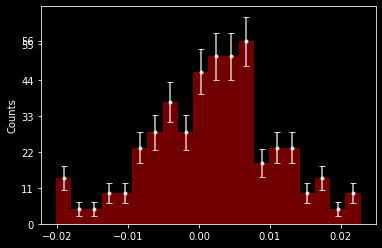

In [160]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

mu, sigma = 0.0, 0.01
arr = np.random.normal(mu, sigma, 100)
counts = plt.hist(arr, 20, density=True, color="red", alpha=0.45)
plt.ylabel("Counts")
maxvalue = int(max(counts[0])) + 1
stepsize = maxvalue // 5
plt.yticks(np.hstack((np.arange(0, maxvalue, step=stepsize), maxvalue)))
binsize = abs(counts[1][0] - counts[1][1])
plt.errorbar(counts[1][1:] - binsize * 0.5, counts[0], yerr = np.sqrt(counts[0]),fmt=".", color="white", capsize=3.0, alpha=0.8)
plt.show()

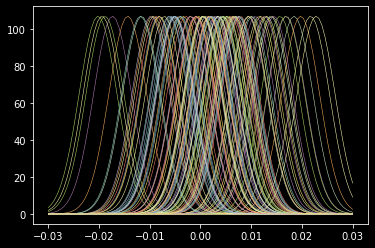

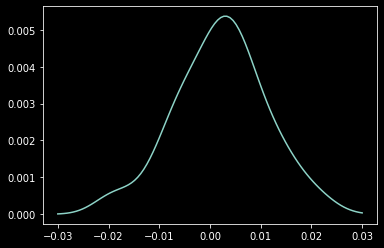

In [161]:
import scipy.integrate as sint
import scipy.stats as st

std = 1.06 * arr.std() * arr.size  ** -0.2

sub_gaussians = []
xaxis = np.linspace(-0.03, 0.03, num=100)
for element in arr:
    one_gau = st.norm(loc=element, scale=std).pdf(xaxis)
    sub_gaussians.append(one_gau)
    plt.plot(xaxis, one_gau, linewidth=0.5)
plt.show()
total_gaussian = np.sum(sub_gaussians, axis=0)
total_gaussian = sint.trapz(arr) * total_gaussian / sint.trapz(total_gaussian)
plt.plot(xaxis, total_gaussian)
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with
a given mean and std (clearly it is better to have different valued means...)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

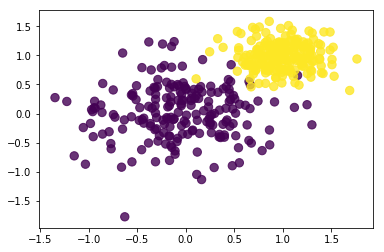

In [162]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('./data/two_categories_scatter_plot.png')

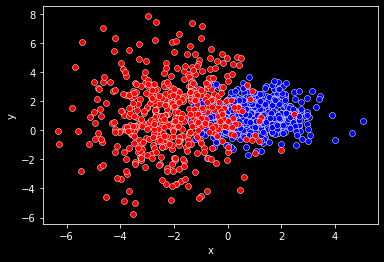

In [163]:
import pandas as pd
import seaborn as sns

dx = dy = 0.001
y, x = np.mgrid[slice(-0.2, 0.2 + dy, dy),
                slice(-0.2, 0.2 + dx, dx)]
pos = np.dstack((x, y))
means_one, cov_one = [1.0, 1.0], [(1.0, 0.05), (0.05, 1.0)]
means_two, cov_two = [-2.0, 1.0], [(2.0, 0), (0, 5.0)]
categ_one = np.random.multivariate_normal(means_one, cov_one, 500)
categ_two = np.random.multivariate_normal(means_two, cov_two, 500)
df1 = pd.DataFrame(categ_one, columns=["x", "y"])
df2 = pd.DataFrame(categ_two, columns=["x", "y"])
sns.scatterplot(x='x', y='y', data=df1, color="blue")
sns.scatterplot(x='x', y='y', data=df2, color="red")
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method,
and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression.
The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable
  number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

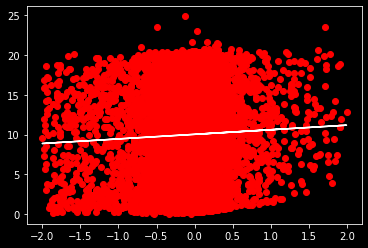

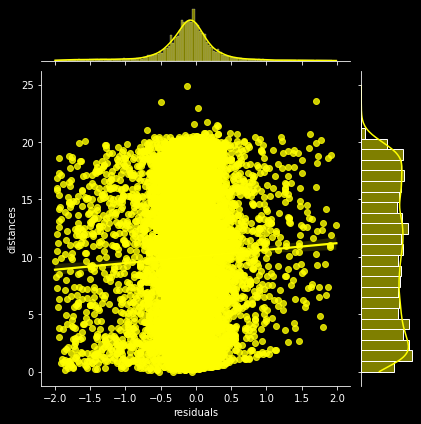

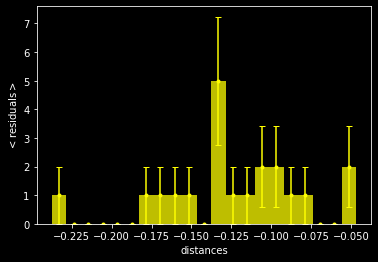

In [220]:
data = np.load("data/residuals_261.npy", allow_pickle=True)
df = pd.DataFrame(data.item())
df = df[np.fabs(df["residuals"]) < 2.0]
slope, intercept, r_value, p_value, std_err = st.linregress(df["residuals"], df["distances"])
plt.scatter(df["residuals"], df["distances"], color="red")
plt.plot(df["residuals"], intercept + slope * df["residuals"], color="white")
sns.jointplot(x=df["residuals"], y=df["distances"], kind="reg", color="yellow")
plt.show()
x = np.arange(0, 21, 1)
y = df.groupby(pd.cut(df["distances"], bins = x)).mean()["residuals"]
yerr = df.groupby(pd.cut(df["distances"], bins = x)).std()["residuals"]
counts = plt.hist(y, len(x), color="yellow", alpha=0.75)
binsize = abs(counts[1][0] - counts[1][1])
plt.errorbar(counts[1][1:] - binsize * 0.5, counts[0], yerr = np.sqrt(counts[0]),fmt=".", color="yellow", capsize=3.0)
plt.xlabel("distances")
plt.ylabel("$<$residuals$>$")
plt.show()